<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [ ]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import numpy as np
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

# SkLearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import gensim  # Highly specialized in topic modeling
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [ ]:
import re

import spacy

#from spacy.tokenizer import Tokenizer
#tokenizer = Tokenizer(nlp.vocab)

In [ ]:
yelp = pd.read_json('review_sample.json', lines=True)

In [ ]:
df = yelp
df.head()

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

**Text preprocessing**

In [ ]:
# Remove punctuation and preserve original text
df['text_cl'] = df['text'].str.replace('[^\w\s]','')

In [ ]:
# Remove newline
df['text_cl'] = df['text_cl'].replace('\n','', regex=True)

In [ ]:
df.head()

**Tokenize function**

In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
def tokenize(doc):
    return [token.lemma_ for token in nlp(doc)]

In [ ]:
df['tokens'] = df['text_cl'].apply(tokenize)

In [ ]:
df.head()

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

**Write fake review**

This fake review is for real! 

In [ ]:
a_review = "Beautiful & the best breakfast in town. Sedona's El Portal is an Arts & Crafts Inn that draws on the aesthetics and ideals of Pre-Raphaelites like William Morris. Stickle y furniture and homemade salsa bring Art & Crafts to the Southwest. The complementary ideals of socialism and capitalism sit side by side in this unique Sedona inn."

In [ ]:
a_review = [a_review]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [ ]:
data = df['text_cl'].tolist()

In [ ]:
# Test data (reviews) are preserved in list object and callable.
data[17]

In [ ]:
len(data)

In [ ]:
data_rev = data + a_review

In [ ]:
len(data_rev)

In [ ]:
data_rev[10000]

**Create vector representation**

In [ ]:
#instantiate transformer (1)
vect = TfidfVectorizer(stop_words='english')

In [ ]:
#learn vocabulary (2)
vect.fit(data_rev)

In [ ]:
# Transform text and produce sparse document term matrices (3)
dtm = vect.transform(data_rev)

In [ ]:
# Test matrix location in memory and format
dtm
#print(dtm)

In [ ]:
# Test transform feature operation
print(vect.get_feature_names())

In [ ]:
# Put sparse matrix in dense format, then DataFrame
dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

**Nearest Neighbors**

In [ ]:
nn = NearestNeighbors(n_neighbors=10, algorithm = 'kd_tree')
nn.fit(dtm_df)

In [ ]:
#Getting most similar reviews to my fake review
nn.kneighbors([dtm_df.iloc[10000].values])

In [ ]:
# My fake review
data_rev[10000]

In [ ]:
# Print most similar reviews
print(data_rev[10000], "\n\n",
     data_rev[4196], "\n\n",
     data_rev[503], "\n\n",
      data_rev[7458], "\n\n",
      data_rev[6860], "\n\n",
      data_rev[1538], "\n\n",
      data_rev[6937], "\n\n",
      data_rev[4666], "\n\n",
      data_rev[43], "\n\n",
      data_rev[878], "\n\n",
     )

**Patterns noticed**
These reviews picked up on Arts & Crafts, Sedona, Inn, salsa and southwest.

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [1]:
#using
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline



In [12]:
import pandas as pd
# Define data and target (rereadig and resetting dataframe)
yelp = pd.read_json('review_sample.json', lines=True)
df = yelp
df.head()
df['text_cl'] = df['text'].str.replace('[^\w\s]','')
df['text_cl'] = df['text_cl'].replace('\n','', regex=True)

X = df['text_cl']
y = df['stars']

**Pipeline star predictions**

In [13]:
# define pipeline
pipe = Pipeline(
                    [
                        ('tfidf', TfidfVectorizer()), 
                        ('clf', KNeighborsClassifier())
                    ]
                )

In [14]:
# fit pipeline
pipe.fit(df['text'], df['stars'])

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [15]:
# Get pipeline star score
pipe.score(X, y)

0.6304

In [17]:
# Pipe predict good
pipe.predict(['Mi Amo is my favorite, most relaxing, spa'])

array([5])

In [18]:
# Pipe predict bad
pipe.predict(['This is the worst, most horrible, terrible restaurant.'])

array([1])

In [20]:
# Pipe predict fake review
pipe.predict(["Beautiful & the best breakfast in town. Sedona's El Portal is an Arts & Crafts Inn that draws on the aesthetics and ideals of Pre-Raphaelites like William Morris. Stickle y furniture and homemade salsa bring Art & Crafts to the Southwest. The complementary ideals of socialism and capitalism sit side by side in this unique Sedona inn."])

array([5])

**Tune pipeline with GridSearch**

In [21]:
 params = {'tfidf__max_df':(0.75, 0.85, 1),
          'clf__n_neighbors': (5, 7, 10)
    
}

grid_search = GridSearchCV(pipe, params, cv=5, n_jobs=-1, verbose=True)

grid_search.fit(df['text_cl'], df['stars'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'tfidf__max_df': (0.75, 0.85, 1), 'clf__n_neighbors': (5, 7, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [22]:
grid_search.best_score_
# Grid search did not improve score in this instance

0.4939

In [23]:
grid_search.predict(["Beautiful with the best breakfast in town. Sedona's El Portal is an Arts & Crafts Inn that draws on the aesthetics and ideals of Pre-Raphaelites like William Morris. The Stickly furniture won't distract you from the homemade salsa and southwestern fare that surprisingly situate these socialist ideals in Sedona."])
# Grid search still returned 5 stars for fake review. 

array([5])

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [66]:
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
import re



In [25]:
pip install --upgrade numpy==1.16.0

Requirement already up-to-date: numpy==1.16.0 in /home/andrea/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages (1.16.0)
Note: you may need to restart the kernel to use updated packages.


In [34]:
yelp = pd.read_json('review_sample.json', lines=True)
df = yelp

df['text_cl'] = df['text'].str.replace('[^\w\s]','')
df['text_cl'] = df['text_cl'].replace('\n','', regex=True)

nlp = spacy.load('en_core_web_lg')

def tokenize(doc):
    return [token.lemma_ for token in nlp(doc)]

tokens= [tokenize(text) for text in df['text_cl']]

In [37]:
# first 10 tokens
tokens[0][0:10]

['beware',
 'fake',
 'fake',
 'FAKEWe',
 'also',
 'own',
 'a',
 'small',
 'business',
 'in']

Learn the vocubalary of the yelp data:

In [41]:
def tokenize2(text):
    return [token for token in simple_preprocess(text) if token not in  STOPWORDS]

In [42]:
tokenize2("This is an absolutely fabulous the the place")

['absolutely', 'fabulous', 'place']

In [43]:
tokens2= [tokenize2(text) for text in df['text_cl']]

In [44]:
tokens2[0][0:10]

['beware',
 'fake',
 'fake',
 'fakewe',
 'small',
 'business',
 'los',
 'alamitos',
 'ca',
 'received']

In [59]:
df['tokens2'] = tokens2

In [47]:
id2word = corpora.Dictionary(tokens2)

In [49]:
id2word[224] 

'recently'

Create a bag of words representation of the entire corpus

In [61]:
corpus = [id2word.doc2bow(text) for text in df['tokens2']]

Your LDA model should be ready for estimation: 

In [62]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [63]:
lda.print_topics()

[(0,
  '0.010*"food" + 0.009*"place" + 0.008*"great" + 0.008*"like" + 0.008*"good" + 0.007*"service" + 0.006*"time" + 0.005*"got" + 0.004*"best" + 0.004*"ive"'),
 (1,
  '0.011*"good" + 0.010*"great" + 0.009*"food" + 0.008*"service" + 0.007*"place" + 0.006*"time" + 0.005*"like" + 0.005*"dont" + 0.004*"come" + 0.004*"best"'),
 (2,
  '0.009*"food" + 0.009*"good" + 0.008*"time" + 0.008*"like" + 0.008*"place" + 0.008*"great" + 0.006*"service" + 0.005*"got" + 0.004*"ordered" + 0.003*"definitely"'),
 (3,
  '0.010*"good" + 0.010*"place" + 0.010*"service" + 0.009*"great" + 0.008*"time" + 0.007*"food" + 0.005*"like" + 0.005*"nice" + 0.004*"dont" + 0.004*"best"'),
 (4,
  '0.009*"place" + 0.008*"food" + 0.008*"great" + 0.007*"like" + 0.007*"good" + 0.006*"time" + 0.005*"service" + 0.004*"got" + 0.004*"went" + 0.004*"im"'),
 (5,
  '0.010*"food" + 0.010*"place" + 0.009*"great" + 0.007*"good" + 0.006*"like" + 0.006*"service" + 0.005*"time" + 0.004*"didnt" + 0.004*"got" + 0.004*"ordered"'),
 (6,
  '0.

In [67]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [68]:
topics = [' '.join(t[0:5]) for t in words]

In [71]:
for id, t in enumerate (topics): 
    print(f"-----Topic {id}-----")
    print(t, "\n")

-----Topic 0-----
food place great like good 

-----Topic 1-----
good great food service place 

-----Topic 2-----
food good time like place 

-----Topic 3-----
good place service great time 

-----Topic 4-----
place food great like good 

-----Topic 5-----
food place great good like 

-----Topic 6-----
food good place time service 

-----Topic 7-----
food service place great like 

-----Topic 8-----
place good food great like 

-----Topic 9-----
place food good great like 



In [74]:
# Visualization 1

import pyLDAvis.gensim
pyLDAvis.enable_notebook()


In [75]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/home/andrea/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.001656  0.001184       1        1  10.745865
8     -0.002894  0.005368       2        1  10.506021
1      0.005680  0.001367       3        1  10.328761
9      0.001188  0.000907       4        1  10.073326
3      0.002801 -0.001220       5        1   9.914362
7     -0.001686 -0.002067       6        1   9.909410
0     -0.000805 -0.004108       7        1   9.805313
4     -0.002648  0.001020       8        1   9.780993
5     -0.001749 -0.001345       9        1   9.515607
2     -0.001544 -0.001107      10        1   9.420343, topic_info=     Category         Freq        Term        Total  loglift  logprob
46    Default  3286.000000     service  3286.000000  30.0000  30.0000
41    Default  4245.000000        good  4245.000000  29.0000  29.0000
391   Default  1393.000000       order  1393.000000  28.0000  28.0000
35    Default  3170.000000        time  3170.000000  27.0000  27.0000
75    Default  1939.000000         got  1939.000000  26.0000  26.0000
19    Default  3214.000000        like  3214.000000  25.0000  25.0000
312   Default  1345.000000         try  1345.000000  24.0000  24.0000
80    Default  1416.000000         ive  1416.000000  23.0000  23.0000
209   Default  3978.000000       great  3978.000000  22.0000  22.0000
362   Default  1116.000000   delicious  1116.000000  21.0000  21.0000
134   Default  4406.000000       place  4406.000000  20.0000  20.0000
747   Default  1539.000000        love  1539.000000  19.0000  19.0000
123   Default  1696.000000        best  1696.000000  18.0000  18.0000
431   Default  1070.000000      better  1070.000000  17.0000  17.0000
354   Default  1371.000000        come  1371.000000  16.0000  16.0000
361   Default  1341.000000  definitely  1341.000000  15.0000  15.0000
31    Default  1138.000000        said  1138.000000  14.0000  14.0000
145   Default  4500.000000        food  4500.000000  13.0000  13.0000
1300  Default  1430.000000     ordered  1430.000000  12.0000  12.0000
385   Default  1346.000000      little  1346.000000  11.0000  11.0000
742   Default   730.000000        home   730.000000  10.0000  10.0000
454   Default   797.000000         eat   797.000000   9.0000   9.0000
47    Default  1446.000000       staff  1446.000000   8.0000   8.0000
37    Default   909.000000        wait   909.000000   7.0000   7.0000
550   Default   617.000000     quality   617.000000   6.0000   6.0000
93    Default  1628.000000        nice  1628.000000   5.0000   5.0000
767   Default   572.000000       taste   572.000000   4.0000   4.0000
1311  Default  1283.000000     chicken  1283.000000   3.0000   3.0000
670   Default  1506.000000       didnt  1506.000000   2.0000   2.0000
588   Default  1495.000000          im  1495.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
529   Topic10   105.483902        told   911.552612   0.2057  -6.0696
157   Topic10   111.419884      pretty   992.691223   0.1752  -6.0148
209   Topic10   350.036438       great  3978.309082  -0.0683  -4.8701
742   Topic10    85.485092        home   730.039490   0.2175  -6.2798
482   Topic10   123.011848        know  1143.860962   0.1324  -5.9158
46    Topic10   293.535919     service  3286.922607  -0.0534  -5.0461
407   Topic10    73.838501      server   625.270081   0.2260  -6.4262
134   Topic10   360.485229       place  4406.029297  -0.1410  -4.8407
247   Topic10   107.499168       right  1004.979370   0.1271  -6.0506
364   Topic10    73.627678      dinner   630.390015   0.2150  -6.4291
670   Topic10   142.309341       didnt  1506.659912   0.0027  -5.7701
1090  Topic10   111.601189         new  1093.220581   0.0803  -6.0132
416   Topic10    92.862549        took   868.374146   0.1268  -6.1970
960   Topic10    76.740555       happy   668.283875   0.1980  -6.3877
385   Topic10   126.533012      little  1346.829590  -0.0027  -5.8876
80    Topic10   130

In [80]:
# Visualization 2
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [81]:
wc = count(df['tokens2'])

In [82]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.10403115565852672

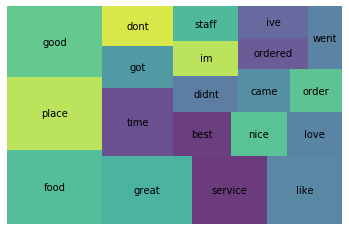

In [84]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [87]:
df['stars'].value_counts(normalize=True)

5    0.4462
4    0.2185
1    0.1496
3    0.1098
2    0.0759
Name: stars, dtype: float64

In [93]:
x = 15+10+8
x
y = 45 + 22 + x
y
x

33

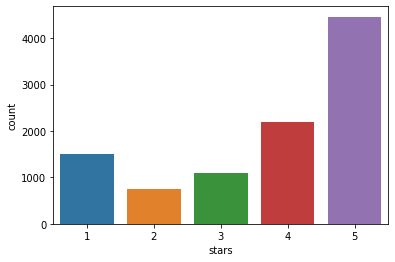

In [86]:
import seaborn as sns
sns.countplot(df['stars'])

## Analysis of Yelp Reviews

**Overall Positive Reviews"

A preliminary analysis shows that these Yelp reviews are mostly positive, with 45% five-star ratings and 22%  4-star ratings. About one-third of of the reviews received 3 stars or less. The top 30-terms used in reviews indicates that scores are determined predominantly by quality, wait time, and service. These reviews appear to be mostly about restaurants, though some more fine-grained analyses reveal that, at a minimum, hotels and tour services are also included among reviews. 

A recommendation for further analysis is to refine the search by combining some of the top 30 terms that have similar meaning, such as "good" and "great". We would also recommend narrowing the catgories so that restaurants, tours, and other services are distinguished from one another, and then determine the avarage star ratings in each domain. In general, though it appears that people post on Yelp when they have a positive experience.  

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)